# SATELLITE DATA ANALYSIS FOR OUR STARTUP

In [2]:
# Instalamos todo lo que necesitamos
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import time
import os
%pip install pandas openpyxl
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importamos el dataset
df_ucs = pd.read_excel(r'C:\Users\Usuario\Desktop\Ironhack\Bootcamp\03_Week3\satellite_data_analysis\Datasets\UCS_Satellite_Database.xlsx')

In [4]:
df_ucs.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ucs.shape

(7560, 67)

In [6]:
df_ucs.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 

In [7]:
df_ucs.loc[7186, 'Date of Launch'] = '01/09/2023' # Cambiamos el formato de una fehca
df_ucs = df_ucs.drop([240, 349]) # Eliminamos dos filas donde no sale la fecha

In [8]:
df_ucs['Date of Launch'] = pd.to_datetime(df_ucs['Date of Launch']) # Convertimos todas las fechas a datetime

### Arreglar columna 'Date of Launch'

In [9]:
df_ucs["Launch Site"].unique()

array(['Satish Dhawan Space Centre', 'Cape Canaveral',
       'Guiana Space Center', 'Baikonur Cosmodrome', 'Vandenberg AFB',
       'Rocket Lab Launch Complex 1', 'Cygnus', 'Dombarovsky Air Base',
       'Xichang Satellite Launch Center', 'Vostochny Cosmodrome',
       'Uchinoura Space Center', 'Jiuquan Satellite Launch Center',
       'Plesetsk Cosmodrome', 'Taiyuan Launch Center', 'Virgin Orbit',
       'Vandeberg AFB', 'Yellow Sea Launch Platform',
       'FANTM-RAiL [Xtenti]',
       'Mid-Atlantic Regional Spaceport/Wallops Island',
       'Wenchang Space Center', 'Orbital ATK L-1011',
       'Tanegashima Space Center', 'International Space Station',
       'Antares', 'Sea Launch Odyssey', 'Svobodny Cosmodrome',
       'Kodiak Launch Complex', 'Wallops Island Flight Facility',
       'Stargazer L-1011', 'Kwajalein Island', 'Taiyan Launch Center',
       'International Space Station - Cygnus', 'Shahroud Missile Range',
       'Palmachim Launch Complex ', 'Satish Dhawan Space Center

In [10]:
df_ucs["Launch Site"].nunique()

40

In [11]:
df_ucs["Launch Site"] = df_ucs["Launch Site"].str.strip()

In [12]:
# Unificar las distintas formas de escribir 'Rocket Lab Launch Complex 1B'
df_ucs["Launch Site"] = df_ucs["Launch Site"].replace("Rocket Lab Launch Complex 1B", "Rocket Lab Launch Complex 1")

In [13]:
# Unificar 'FANTM-RAiL (Xtenti)' y 'FANTM-RAiL [Xtenti]' y pasarlo a 'Cape Canaveral' ya que he investigado, y esta empresa usa esa localización
df_ucs["Launch Site"] = df_ucs["Launch Site"].replace(['FANTM-RAiL (Xtenti)', 'FANTM-RAiL [Xtenti]'], 'Cape Canaveral')

In [14]:
# Reemplazar múltiples localizaciones por 'Plain/ISS Launch' ya que no puedo obtener el clima en esos sitios ya que no son terrestres
plane_iss_launch = ['Orbital ATK L-1011','International Space Station - Cygnus','International Space Station','Cygnus','Stargazer L-1011','Virgin Orbit']
df_ucs["Launch Site"] = df_ucs["Launch Site"].replace(plane_iss_launch, "Plane/ISS Launch")

In [15]:
# Unificar Vandenber AFB
df_ucs['Launch Site'] = df_ucs['Launch Site'].replace('Vandeberg AFB', 'Vandenberg AFB')

In [16]:
# Unificar Satish Dhawan Space Center
df_ucs['Launch Site'] = df_ucs['Launch Site'].replace('Satish Dhawan Space Centre', 'Satish Dhawan Space Center')

In [17]:
# Unificar Kodiak Launch Complex
df_ucs['Launch Site'] = df_ucs['Launch Site'].replace('Kodiak Island', 'Kodiak Launch Complex')

In [18]:
# Unificar Wenchang Space Launch Site
df_ucs["Launch Site"] = df_ucs["Launch Site"].replace(['Wenchang Satellite Launch Center', 'Wenchang Space Center'], 'Wenchang Space Launch Site')

In [19]:
# Corregir valores
df_ucs['Launch Site'] = df_ucs['Launch Site'].replace('Taiyan Launch Center', 'Taiyuan Launch Center')

In [20]:
df_ucs["Launch Site"].unique()

array(['Satish Dhawan Space Center', 'Cape Canaveral',
       'Guiana Space Center', 'Baikonur Cosmodrome', 'Vandenberg AFB',
       'Rocket Lab Launch Complex 1', 'Plane/ISS Launch',
       'Dombarovsky Air Base', 'Xichang Satellite Launch Center',
       'Vostochny Cosmodrome', 'Uchinoura Space Center',
       'Jiuquan Satellite Launch Center', 'Plesetsk Cosmodrome',
       'Taiyuan Launch Center', 'Yellow Sea Launch Platform',
       'Mid-Atlantic Regional Spaceport/Wallops Island',
       'Wenchang Space Launch Site', 'Tanegashima Space Center',
       'Antares', 'Sea Launch Odyssey', 'Svobodny Cosmodrome',
       'Kodiak Launch Complex', 'Wallops Island Flight Facility',
       'Kwajalein Island', 'Shahroud Missile Range',
       'Palmachim Launch Complex', 'Naro Space Center'], dtype=object)

### Creamos una nueva columna con las coordenadas de cada localización

In [23]:
# Diccionario de las coordenadas de cada valor único de la columna 'Launch Site' con los valores únicos
launch_site_coordinate = {
    'Vandenberg AFB': (34.74738558053763, -120.57287382598979),
    'Cape Canaveral': (28.478816053592052, -80.57606021672525),
    'Guiana Space Center': (5.23314401858844, -52.776983796694616),
    'Baikonur Cosmodrome': (45.96725377748388, 63.30547994996387),
    'Wallops Island Flight Facility': (37.933875469177956, -75.47227890015118),
    'Satish Dhawan Space Center': (13.726115425221352, 80.22658668288408),
    'Sea Launch Odyssey': (33.75803115528897, -118.21714540854131),
    'Svobodny Cosmodrome': (51.79375147822065, 128.18611741169877),
    'Plesetsk Cosmodrome': (62.92795253294236, 40.574883713321356),
    'Palmachim Launch Complex': (31.89933331285537, 34.69069702671702),
    'Taiyuan Launch Center': (38.848744585386704, 111.60792935276686),
    'Xichang Satellite Launch Center': (28.246289127653373, 102.02655974251424),
    'Jiuquan Satellite Launch Center': (40.95820141282573, 100.29113255468557),
    'Dombarovsky Air Base': (50.800636829015794, 59.51676155312275),
    'Uchinoura Space Center': (31.251286366566344, 131.07612469723395),
    'Kwajalein Island': (8.720654879025744, 167.73129220584238),
    'Tanegashima Space Center': (30.37513340280436, 130.95763536784997),
    'Kodiak Launch Complex': (57.43532950799345, -152.33958590527274),
    'Naro Space Center': (34.45356111005476, 127.51782879680057),
    'Vostochny Cosmodrome': (51.84953794993724, 128.35530328395734),
    'Wenchang Space Launch Site': (19.619733115878066, 110.95159716666655),
    'Rocket Lab Launch Complex 1': (-39.26076827278987, 177.8658598361479),
    'Yellow Sea Launch Platform': (35.01725874873759, 122.99900258520917),
    'Shahroud Missile Range': (36.20102786793409, 55.33395241490814),
    'Mid-Atlantic Regional Spaceport/Wallops Island': (37.93221269267054, -75.4813545300791),
    'Antares': (37.932076857305944, -75.48138113038931),
    'Plane/ISS Launch': None,
}

# Asignamos las coordenadas en la nueva columna 'Geographic Coordinate'
df_ucs['Geographic Coordinate'] = df_ucs['Launch Site'].map(launch_site_coordinate)

### Eliminamos columnas que no necesitamos

In [24]:
df_ucs.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 

In [25]:
# Eliminar columnas que no necesito
df_ucs.drop(['Source',
       'Source.1', 'Source.2', 'Source.3', 'Source.4', 'Source.5', 'Source.6',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66'], axis=1, inplace=True)


### Reordenamos las columnas según nuestro criterio

In [26]:
df_ucs.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Geographic Coordinate'],
      dtype='object')

In [27]:
# Recordenar columnas
nuevo_orden = ['Date of Launch', 'Geographic Coordinate', 'COSPAR Number', 'NORAD Number','Current Official Name of Satellite', 'Launch Site', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Launch Vehicle', 'Expected Lifetime (yrs.)',
       'Contractor', 'Country of Contractor', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)', 
       'Comments', 'Unnamed: 27', 'Source Used for Orbital Data',
       ] 
df_ucs = df_ucs[nuevo_orden]

### Ordenamos todo el DF de más antiguo o más reciente

In [28]:
# Ordenamos el df en orden de más antiguo o más reciente
df_ucs = df_ucs.sort_values(by='Date of Launch')

In [29]:
# Para restablecer el índice
df_ucs = df_ucs.reset_index(drop=True)

In [30]:
df_ucs.head()

,Date of Launch,Geographic Coordinate,COSPAR Number,NORAD Number,Current Official Name of Satellite,Launch Site,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Launch Vehicle,...,Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Comments,Unnamed: 27,Source Used for Orbital Data
0,1974-11-15,"(34.74738558053763, -120.57287382598979)",1974-089B,7530,Amsat-Oscar 7,Vandenberg AFB,USA,USA,AMSAT-NA,Delta 2310,...,1459.0,0.001215,101.40,114.90,29.0,NaN,NaN,American amateur radio satellite.,NaN,www.satellitedebris.net 12/12
1,1988-09-29,"(28.478816053592052, -80.57606021672525)",1988-091B,19548,TDRS-3,Cape Canaveral,USA,USA,National Aeronautics and Space Administration ...,Space Shuttle (STS 26),...,35878.0,0.002194,11.53,1436.06,3180.0,1600,1800,Backup; still partially operational.,NaN,JM/12_08
2,1989-09-25,"(28.478816053592052, -80.57606021672525)",1989-077A,20253,USA 46,Cape Canaveral,USA,USA,US Navy,Atlas Centaur,...,35829.0,0.000996,8.97,1436.13,2310.0,1884,NaN,Old system replaced by UFO satellites; this sa...,NaN,JM/2_09
3,1990-04-25,"(28.478816053592052, -80.57606021672525)",1990-037B,20580,Hubble Space Telescope,Cape Canaveral,USA,ESA,European Space Agency (ESA)/NASA,Space Shuttle (STS 31),...,559.0,0.000289,28.50,95.80,11110.0,NaN,2400,Exploration of space.,NaN,www.satellitedebris.net 12/12
4,1990-08-30,"(5.23314401858844, -52.776983796694616)",1990-079A,20776,Skynet 4C,Guiana Space Center,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Ariane 44LP,...,35787.0,0.000024,13.60,1436.07,1474.0,850,1200,Spare. In March 2010 it was announced that the...,NaN,JM/12_08


## API OPEN-METEO.COM PARA INCLUIR EL CLIMA (CON DISTINTAS VARIABLES) DEL LUGAR EXACTO SEGÚN LAS COORDENADAS Y SEGÚN EL DÍA

Voy a extraer de la API open-meteo.com todas estas variables según las coordenadas exactas y la fecha exacta (son daily weather variables): 

Weather code, Mean Temperature (2 m), Precipitation Sum, Precipitation Hours, Maximum Wind Speed (10 m), Maximum Wind Gusts (10 m), Mean Cloud cover, Mean Precipitation Probability, Mean Relative Humidity (2 m), Mean Visibility

In [31]:
# Muestra tipos únicos en la columna
df_ucs['Geographic Coordinate'].apply(type).value_counts()

Geographic Coordinate
<class 'tuple'>       7503
<class 'NoneType'>      55
Name: count, dtype: int64

In [32]:
# Creamos un mask para filtrar la filas con coordenadas válidas (tuplas) ya que hay otras que no tienen coordenadas, es decir nulas. El .notna() te devuelve True or False
mask = df_ucs['Geographic Coordinate'].notna()

In [33]:
# Extraer latitud y longitud solo donde hay coordenadas válidas.
# 1o seleccionamos las filas válidas, quitamos los paréntesis con strip, separamos por la coma con split y convertimos a float
# 2o Ponemos nombre a las dos nuevas columnas y las insertamos de nuevo cuando Mask es True
coords = df_ucs.loc[mask, 'Geographic Coordinate'].astype(str)
lat_lon = coords.str.strip('()').str.split(', ', expand=True).astype(float)
lat_lon.columns = ['lat', 'lon']
df_ucs.loc[mask, ['lat', 'lon']] = lat_lon

In [34]:
# Formatear la fecha a string para las llamadas a la API, la dejamos en formato datetime ('%Y-%m-%d' convierte a año-mes-día, el formato que pide la API)
df_ucs['date'] = df_ucs['Date of Launch'].dt.strftime('%Y-%m-%d')

In [37]:
# Definimos la función que consulta la API open-Meteo
def open_meteo_data(lat, lon, date):
    url = (
        "https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={date}&end_date={date}"
        "&daily=weathercode,temperature_2m_mean,precipitation_sum,"
        "precipitation_hours,windspeed_10m_max,windgusts_10m_max,"
        "cloudcover_mean,precipitation_probability_mean,"
        "relative_humidity_2m_mean,visibility_mean"
        "&timezone=UTC"
    ) # Contruimos la urls según la documentación y según las variables que queremos
    try:
        res = requests.get(url)
        res.raise_for_status() # Si la respuesta no es 200, lanzará un error
        data = res.json() # Pasamos la respuesta a un diccionaio de python
        if 'daily' not in data or not data['daily']['time']:
            return [None] * 10 # Si no devuelve datos diarios, devolvemos 10 nones (ya que hay 10 variables)
        d = data['daily'] # Para guardar en la variable d el contenido de 'daily' del JSON que devuelve la API
        return [
            d['weathercode'][0],
            d['temperature_2m_mean'][0],
            d['precipitation_sum'][0],
            d['precipitation_hours'][0],
            d['windspeed_10m_max'][0],
            d['windgusts_10m_max'][0],
            d['cloudcover_mean'][0],
            d['precipitation_probability_mean'][0],
            d['relative_humidity_2m_mean'][0],
            d['visibility_mean'][0]
        ] # Devolvemos cada valor que hemos pedido en formato lista
    except Exception as e:
        print(f"Error en {lat}, {lon}, {date}: {e}")
        return [None] * 10 # Si algo falla, imprime y devuelve 10 nones (uno por cada categoría)

In [38]:
# Columnas que quiero añdir
columns = [
    'weathercode', 'temperature_2m_mean', 'precipitation_sum', 'precipitation_hours',
    'windspeed_10m_max', 'windgusts_10m_max', 'cloudcover_mean',
    'precipitation_probability_mean', 'relative_humidity_2m_mean', 'visibility_mean'
]
df_ucs[columns] = None # Creamos las columnas vacías (None) en el df

In [39]:
# Iteraramos sobre filas válidas para llenar los datos
for i in df_ucs[mask].index: # Recorre solo los índices donde mask es True (filas con coordenadas)
    lat, lon, date = df_ucs.loc[i, ['lat', 'lon', 'date']] # Recuperamos lat/lon/date de la fila i, saca los 3 valores de esa fila
    weather_data = open_meteo_data(lat, lon, date) # Usamos la función de la API y guardamos esos 10 valores
    df_ucs.loc[i, columns] = weather_data # Asignamos esos datos a las 10 columnas de la misma fila
    time.sleep(0.5) # Esto sirve para pausar un segundo entre petición y no sobrecargar la API

In [40]:
df_ucs.drop(columns=['precipitation_probability_mean', 'visibility_mean'], inplace=True)

In [41]:
# Función que recibe el número de weathercode y según en qué rango esté, devuelve una descripción
# Después con .apply() lo aplicaremos a cada fila según los datos de la columna 'weathercode' para guardarlo todo en otra columna: 'weather_summary'
def map_weather_code(code):
    if code is None:  # Si el código es None, devolvemos 'Desconocido'
        return "Desconocido"
    if code == 0:
        return "Soleado"
    elif 1 <= code <= 3:
        return "Parcialmente nublado"
    elif 45 <= code <= 48:
        return "Niebla"
    elif 51 <= code <= 67:
        return "Lluvia ligera"
    elif 71 <= code <= 77:
        return "Nieve"
    elif 80 <= code <= 82:
        return "Lluvias fuertes"
    elif 95 <= code <= 99:
        return "Tormentas eléctricas"
    else:
        return "Desconocido"

# Aplicar la función a la columna 'weathercode', manejando los valores None
df_ucs['weather_summary'] = df_ucs['weathercode'].apply(map_weather_code)

## Seguimos con la limpieza

In [42]:
df_ucs.columns

Index(['Date of Launch', 'Geographic Coordinate', 'COSPAR Number',
       'NORAD Number', 'Current Official Name of Satellite', 'Launch Site',
       'Country/Org of UN Registry', 'Country of Operator/Owner',
       'Operator/Owner', 'Launch Vehicle', 'Expected Lifetime (yrs.)',
       'Contractor', 'Country of Contractor', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)', 'Comments',
       'Unnamed: 27', 'Source Used for Orbital Data', 'lat', 'lon', 'date',
       'weathercode', 'temperature_2m_mean', 'precipitation_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'cloudcover_mean', 'relative_humidity_2m_mean', 'weather_summary'],
      dtype='object')

### Arreglar columna 'Country/Org of UN Registry'

In [43]:
df_ucs['Country/Org of UN Registry'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Brazil', 'NR', 'Luxembourg',
       'ESA', 'France', 'Canada', 'Italy', 'Sweden', 'Germany', 'Russia',
       'EUMETSAT/ESA', 'Spain', 'Saudi Arabia', 'Greece',
       'United Arab Emirates', 'Australia', 'India', 'China', 'EUMETSAT',
       'Mexico', 'South Korea', 'Indonesia', 'Norway', 'Turkey',
       'Thailand', 'Malaysia', 'Algeria', 'Kazakhstan', 'Pakistan',
       'Nigeria', 'Chile', 'Belarus', 'Venezuela', 'China/Sri Lanka',
       'Azerbaijan', 'Austria', 'South Africa', 'Bolivia', 'Iraq',
       'Argentina', 'Inda', 'United KIngdom', 'Laos', 'Denmark', 'Peru',
       'Uruguay', 'Finland', 'Belgium', 'Israel', 'NR (12/20)',
       'Colombia', 'Lithuania', 'NR ', 'Czech Republic', 'New Zealand',
       'Egypt', 'Ethiopia', 'NR (1/22)', 'NR (5/21)', 'NR (9/21)',
       'NR (4/22)', 'Netherlands', 'NR (9/22)', 'NR (9_22)', 'NR (12/22)',
       'NR (9/23)', nan], dtype=object)

In [44]:
# Reemplazar todas las variantes de NR (Not Recorded) por Unknown
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].replace({
    'NR': 'Unknown',
    'NR (12/20)': 'Unknown',
    'NR ': 'Unknown',
    'NR(12/20)': 'Unknown',
    'NR (1/22)': 'Unknown',
    'NR (5/21)': 'Unknown',
    'NR (9/21)': 'Unknown',
    'NR (4/22)': 'Unknown',
    'NR (9/22)': 'Unknown',
    'NR (9_22)': 'Unknown',
    'NR (12/22)': 'Unknown',
    'NR (9/23)': 'Unknown'
})

# Unificar errores de escritura y duplicados
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].replace({
    'United KIngdom': 'United Kingdom',
    'Inda': 'India'
})

# Agrupar registros similares
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].replace('China/Sri Lanka', 'China')

# Unirficar EUMETSAT
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].replace('EUMETSAT/ESA', 'EUMETSAT')

# Eliminar espacios en blanco
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].str.strip()

# Rellenar nulos con 'Unknown'
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].fillna('Unknown')


In [45]:
# Agrupar países que siempre que han lanzado un satélite, ya estaban dentro de la 'ESA', exceptuando Greece y Luxembourg que tienen lanzamientos anteriores a su entrada
esa_group = ['France', 'Germany', 'Italy', 'Spain', 'Belgium', 'Sweden',
             'Austria', 'Finland', 'Norway', 'Denmark', 'Netherlands',
             'United Kingdom', 'Switzerland', 'Czech Republic',
             'Hungary', 'Poland']

df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].replace(esa_group, 'ESA')

# Limpiar espacios en blanco
df_ucs['Country/Org of UN Registry'] = df_ucs['Country/Org of UN Registry'].str.strip()

### Arreglar y analizar la columna 'Operator/Owner'

In [46]:
df_ucs['Operator/Owner'].nunique()

668

In [47]:
operator_counts = df_ucs['Operator/Owner'].value_counts()
operator_counts

Operator/Owner
SpaceX                                  3950
OneWeb Satellites                        589
Planet Labs, Inc.                        220
Chinese Ministry of National Defense     149
Spire Global Inc.                        135
                                        ... 
Hellas-Sat Consortium Ltd./INMARSAT        1
University of Montpellier                  1
FH Aachen                                  1
Bulsatcom                                  1
VISIONA Tecnologia Espacial S.A.           1
Name: count, Length: 668, dtype: int64

In [48]:
top_15_operators = operator_counts.head(15)
top_15_operators

Operator/Owner
SpaceX                                       3950
OneWeb Satellites                             589
Planet Labs, Inc.                             220
Chinese Ministry of National Defense          149
Spire Global Inc.                             135
Ministry of Defense                           117
Swarm Technologies                             90
Iridium Communications, Inc.                   75
Chang Guang Satellite Technology Co. Ltd.      60
China Academy of Space Technology (CAST)       49
National Reconnaissance Office (NRO)           48
Indian Space Research Organization (ISRO)      47
Spacex                                         46
SES S.A.                                       46
European Space Agency (ESA)                    40
Name: count, dtype: int64

### Arreglar y analizar la columna 'Launch Vehicle'

In [50]:
df_ucs['Launch Vehicle'].nunique()

165

In [52]:
launch_vehicle_counts = df_ucs['Launch Vehicle'].value_counts()
launch_vehicle_counts

Launch Vehicle
Falcon 9                  4731
Soyuz-2.1b                 475
PSLV                       189
Long March 2D              147
Atlas 5                    114
                          ... 
Space Shuttle (STS 26)       1
Delta 7420                   1
PSLV C10                     1
Zenit 2M                     1
PSLV C17                     1
Name: count, Length: 165, dtype: int64

In [53]:
top_10_launch_vehicles = launch_vehicle_counts.head(10)
top_10_launch_vehicles

Launch Vehicle
Falcon 9         4731
Soyuz-2.1b        475
PSLV              189
Long March 2D     147
Atlas 5           114
Electron          102
Ariane 5           95
Soyuz-2.1a         88
Long March 3B      86
Long March 2C      79
Name: count, dtype: int64

### Arreglar y analizar columna "Expected Lifetime (yrs.)"

In [55]:
df_ucs["Expected Lifetime (yrs.)"].apply(type).value_counts()

Expected Lifetime (yrs.)
<class 'float'>    7558
Name: count, dtype: int64

In [56]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs["Expected Lifetime (yrs.)"].notna().sum()) # Con valor
print(df_ucs["Expected Lifetime (yrs.)"].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs["Expected Lifetime (yrs.)"].describe())

# Mediana
print("Mediana:", df_ucs["Expected Lifetime (yrs.)"].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs["Expected Lifetime (yrs.)"].mode()[0])


7558
5450
2108
count    5450.000000
mean        5.350413
std         3.421953
min         0.250000
25%         4.000000
50%         4.000000
75%         5.000000
max        30.000000
Name: Expected Lifetime (yrs.), dtype: float64
Mediana: 4.0
Moda: 4.0


##### Estadísticas explicadas:
- count: Nos dice cuántos valores no vacíos hay: 5.450 satélites tienen valor
- mean: La media (promedio) de años esperados de vida útil: 5.35 años
- std: La desviación estándar, mide cuánto varían los valores respecto a la media, cuanto más alto, más dispersos están. Si std es tan grande como la media significa que los datos están muy dispersos. Si es mucho menor, están bien agrupados. Nosotros Tenemos 3.42 (3.42/5.35 = 0.64), por lo que hay una dispersión moderada
- min: Es el valor más pequeño, hay un satélite que esperaba durar solo 0.25 años
- 25%: El percentil indica que el 25% más bajo de los satélites tenía menos de 4 años de vida útil
- 50%: El percentil 50 (mediana) nos dice que la mitad de los satélites duran 4 años o menos
- 75%: El percentil 75 dice que el 75% de los satélites duran 5 años o menos
- max: El valor más alto dice que hay un satélite con 30 años de vida esperada

### Arreglar y analizar columna 'Contractor'

In [57]:
df_ucs['Contractor'].nunique()

577

In [58]:
contractor_counts = df_ucs['Contractor'].value_counts()
contractor_counts

Contractor
SpaceX                                      3996
OneWeb Satellites/Airbus                     502
Planet Labs, Inc.                            199
China Academy of Space Technology (CAST)     182
Spire Global                                 135
                                            ... 
MIT/LL-UM Amherst                              1
Astranis                                       1
NASA Small Satellite Technology Program        1
Vanderbilt University/AMSAT                    1
Visiona Tecnologia Espacial                    1
Name: count, Length: 577, dtype: int64

In [59]:
top_15_contractors = contractor_counts.head(15)
top_15_contractors

Contractor
SpaceX                                               3996
OneWeb Satellites/Airbus                              502
Planet Labs, Inc.                                     199
China Academy of Space Technology (CAST)              182
Spire Global                                          135
Space Systems/Loral                                   105
Thales Alenia Space                                   100
Swarm Technologies                                     90
OneWeb Satellites                                      87
Thales Alenia Space/Orbital ATK                        75
Boeing Satellite Systems                               71
ISS Reshetnev                                          68
Orbital Sciences Corp.                                 64
Chang Guang Satellite Technology Co. Ltd.              60
Shanghai Academy of Spaceflight Technology (SAST)      52
Name: count, dtype: int64

### Arreglar y analizar columna 'Users'

In [61]:
df_ucs['Users'].unique()

array(['Civil', 'Government', 'Military', 'Government/Commercial',
       'Commercial', 'Military/Commercial', 'Government/Civil',
       'Government/Commercial/Military', 'Military/Government',
       'Military/Civil', 'Government/Military', 'Military ',
       'Civil/Government', 'Commercial/Military', 'Commercial ',
       'Commercial/Civil', 'Commercial/Government', 'Civil/Military',
       'Government ', 'Civil/Commercial'], dtype=object)

In [62]:
# Eliminar espacios en blanco al principio y final
df_ucs["Users"] = df_ucs["Users"].str.strip()

# Corregir erores de escritura
df_ucs["Users"] = df_ucs["Users"].replace("Military ", "Military")
df_ucs["Users"] = df_ucs["Users"].replace("Commercial ", "Commercial")
df_ucs["Users"] = df_ucs["Users"].replace("Government ", "Government")

# Unificar combinaciones con orden alfabético
df_ucs["Users"] = df_ucs["Users"].replace("Government/Civil", "Civil/Government")
df_ucs["Users"] = df_ucs["Users"].replace("Military/Government", "Government/Military")
df_ucs["Users"] = df_ucs["Users"].replace("Military/Civil", "Civil/Military")
df_ucs["Users"] = df_ucs["Users"].replace("Military/Commercial", "Commercial/Military")
df_ucs["Users"] = df_ucs["Users"].replace("Government/Commercial", "Commercial/Government")
df_ucs["Users"] = df_ucs["Users"].replace("Commercial/Civil", "Civil/Commercial")

# Ordenar 3 categorias
df_ucs["Users"] = df_ucs["Users"].replace("Government/Commercial/Military", "Commercial/Government/Military")

# Limpieza de espacios
df_ucs["Users"] = df_ucs["Users"].str.strip()

In [63]:
from collections import Counter
# Primero unimos todos los valores de la columna en un solo string
usuarios_unidos = "/".join(df_ucs["Users"].dropna().tolist())
# Separamos todos los elementos individuales
usuarios_separados = usuarios_unidos.split("/")
# Contamos cuántas veces aparece cada uno
conteo = Counter(usuarios_separados)
conteo


Counter({'Commercial': 6267, 'Government': 762, 'Military': 613, 'Civil': 219})

### Arreglar y analizar columna 'Purpose'

In [64]:
df_ucs['Purpose'].unique()

array(['Communications', 'Space Science', 'Earth Observation',
       'Navigation/Global Positioning', 'Earth Science',
       'Earth Observation/Technology Development',
       'Technology Demonstration', 'Technology Development',
       'Communications/Technology Development',
       'Communications/Maritime Tracking',
       'Earth Observation/Communications',
       'Navigation/Regional Positioning', 'Space Observation',
       'Communications/Navigation', 'Technology Development/Educational',
       'Earth Observation/Communications/Space Science',
       'Earth Observation ', 'Space Science/Technology Development',
       'Earth Science/Earth Observation',
       'Earth Observation/Space Science', 'Surveillance',
       'Earth Observation/Earth Science', 'Educational',
       'Mission Extension Technology', 'Earth/Space Observation',
       'Space Science/Technology Demonstration', 'Unknown', 'Platform',
       'Satellite Positioning', 'Earth Observation/Navigation',
       'Mete

In [66]:
# Eliminar espacios
df_ucs["Purpose"] = df_ucs["Purpose"].str.strip()

# Corregir valores con espacios
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Earth Observation ", "Earth Observation")
# Unificar
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Surveillance", "Military")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Educational", "Education")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Mission Extension Technology", "Technology Development")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Platform", "Technology Development")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Technology Demonstration", "Technology Development")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Communications/Maritime Tracking", "Communications")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Space Science/Technology Demonstration", "Space Science/Technology Development")
df_ucs["Purpose"] = df_ucs["Purpose"].replace("Technology Development/Educational", "Technology Development/Education")

df_ucs["Purpose"] = df_ucs["Purpose"].replace(['Global Positioning', 'Regional Positioning', 'Satellite Positioning', 'Navigation', 'Navigation/Global Positioning', 'Navigation/Regional Positioning'], 
                                              'Satellite Navigation')

df_ucs["Purpose"] = df_ucs["Purpose"].replace('Communications/Navigation', 'Communications/Satellite Navigation')
df_ucs["Purpose"] = df_ucs["Purpose"].replace('Earth Observation/Navigation', 'Earth Observation/Satellite Navigation')



In [ ]:
#df_ucs["Purpose"] = df_ucs["Purpose"].replace("Earth", "Earth Observation/Earth Science")

In [67]:
# Primero unimos todos los valores de la columna en un solo string
purpose_unido = "/".join(df_ucs["Purpose"].dropna().tolist())
# Separamos todos los elementos individuales
purpose_separado = purpose_unido.split("/")
# Contamos cuántas veces aparece cada uno
conteo_purpose = Counter(purpose_separado)
conteo_purpose


Counter({'Communications': 5527,
         'Earth Observation': 1258,
         'Technology Development': 454,
         'Satellite Navigation': 166,
         'Space Science': 103,
         'Earth Science': 30,
         'Military': 20,
         'Space Observation': 13,
         'Unknown': 10,
         'Meteorological': 6,
         'Earth': 4,
         'Education': 3})

### Arreglar y analizar columna 'Class of Orbit'

In [68]:
df_ucs['Class of Orbit'].unique()

array(['LEO', 'GEO', 'Elliptical', 'MEO', 'LEo'], dtype=object)

In [69]:
df_ucs['Class of Orbit'] = df_ucs['Class of Orbit'].replace('LEo', 'LEO')

In [70]:
df_ucs['Class of Orbit'].value_counts()

Class of Orbit
LEO           6766
GEO            590
MEO            143
Elliptical      59
Name: count, dtype: int64

- LEO (Low Earth Orbit):
    - Esta órbita se encuentra a una altitud de entre 160 y 2000 km sobre la Tierra (orbita baja)
    - Se usa comúnmente para satélites de observación terrestre, estaciones espaciales (como la Estación Espacial Internacional) y satélites de comunicación
- GEO (Geostationary Earth Orbit):
    - Los satélites en una órbita geoestacionaria se encuentran a aproximadamente 35786 km sobre el ecuador terrestre
    - Estos satélites tienen la misma velocidad de rotación que la Tierra, por lo que permanecen sobre el mismo punto de la superficie de la Tierra durante todo su recorrido
    - Se utilizan principalmente para comunicaciones, meteorología y telecomunicaciones
- MEO (Medium Earth Orbit):
    - Se encuentra entre 2000 km y 35786 km sobre la Tierra, es decir, entre las órbitas LEO y GEO.
    - Los satélites de navegación, como los satélites GPS, generalmente están en esta órbita.
- Elliptical:
    - Es una órbita elíptica, es decir, una órbita que no es perfectamente circular. La distancia del satélite respecto a la Tierra varía durante su órbita.
    - Generalmente se usa en satélites que necesitan pasar cerca de la Tierra en algunas partes de su órbita y alejarse en otras (por ejemplo, satélites de comunicación en órbitas de tipo MOLNIYA).

### Arreglar y analizar columna 'Type of Orbit'

In [71]:
df_ucs['Type of Orbit'].unique()

array(['Polar', nan, 'Non-Polar Inclined', 'Deep Highly Eccentric',
       'Molniya', 'Sun-Synchronous', 'Equatorial', 'Elliptical',
       'Cislunar', 'Sun-Synchronous near polar', 'Retrograde'],
      dtype=object)

In [72]:
df_ucs['Type of Orbit'].value_counts()

Type of Orbit
Non-Polar Inclined            4041
Sun-Synchronous               1691
Polar                         1096
Equatorial                      38
Molniya                         23
Deep Highly Eccentric            9
Elliptical                       5
Sun-Synchronous near polar       2
Cislunar                         1
Retrograde                       1
Name: count, dtype: int64

### Arreglar y analizar columna 'Longitude of GEO (degrees)'

In [73]:
df_ucs['Longitude of GEO (degrees)'].nunique()

453

In [75]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Longitude of GEO (degrees)'].notna().sum()) # Con valor
print(df_ucs['Longitude of GEO (degrees)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Longitude of GEO (degrees)'].describe())

# Mediana
print("Mediana:", df_ucs['Longitude of GEO (degrees)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Longitude of GEO (degrees)'].mode()[0])

7558
7556
2
count    7556.000000
mean        1.704792
std        26.293797
min      -179.800000
25%         0.000000
50%         0.000000
75%         0.000000
max       359.000000
Name: Longitude of GEO (degrees), dtype: float64
Mediana: 0.0
Moda: 0.0


- Significado: La longitud geográfica de un satélite en órbita geoestacionaria (GEO). Esta es la posición del satélite en el plano ecuatorial terrestre, medida en grados.

- Análisis: Puedes calcular la media, mediana, desviación estándar, etc., para saber en qué longitud geográfica están ubicados principalmente los satélites GEO.

### Arreglar y analizar columna 'Perigee (km)'

In [76]:
df_ucs['Perigee (km)'].nunique()

793

In [77]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Perigee (km)'].notna().sum()) # Con valor
print(df_ucs['Perigee (km)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Perigee (km)'].describe())

# Mediana
print("Mediana:", df_ucs['Perigee (km)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Perigee (km)'].mode()[0])

7558
7552
6
count     7552.000000
mean      3704.371425
std       9716.361912
min        150.000000
25%        521.000000
50%        548.000000
75%        600.250000
max      62200.000000
Name: Perigee (km), dtype: float64
Mediana: 548.0
Moda: 548.0


- Significado: La distancia más cercana que tiene el satélite a la Tierra durante su órbita. El perigeo es el punto más cercano en la órbita de un satélite respecto a la Tierra.

- Análisis: Este valor te permitirá saber qué tan cercanos están los satélites a la Tierra en promedio, lo cual es relevante para las órbitas LEO o MEO.

### Arreglar y analizar columna 'Apogee (km)'

In [78]:
df_ucs['Apogee (km)'].nunique()

784

In [79]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Apogee (km)'].notna().sum()) # Con valor
print(df_ucs['Apogee (km)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Apogee (km)'].describe())

# Mediana
print("Mediana:", df_ucs['Apogee (km)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Apogee (km)'].mode()[0])

7558
7552
6
count      7552.000000
mean       4236.864142
std       13123.801999
min          49.000000
25%         536.000000
50%         561.000000
75%         626.000000
max      353798.000000
Name: Apogee (km), dtype: float64
Mediana: 561.0
Moda: 541.0


- Significado: La distancia más lejana del satélite a la Tierra durante su órbita. El apogeo es el punto más alejado en la órbita de un satélite respecto a la Tierra.

- Análisis: Similar al perigeo, el análisis de este dato te mostrará la distancia máxima de los satélites en sus órbitas.

### Arreglar y analizar columna 'Eccentricity'

In [80]:
df_ucs['Eccentricity'].nunique()

1873

In [81]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Eccentricity'].notna().sum()) # Con valor
print(df_ucs['Eccentricity'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Eccentricity'].describe())

# Mediana
print("Mediana:", df_ucs['Eccentricity'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Eccentricity'].mode()[0])

7558
7548
10
count    7548.000000
mean        0.480945
std        15.568209
min        -0.033429
25%         0.000199
50%         0.000296
75%         0.000939
max       575.000000
Name: Eccentricity, dtype: float64
Mediana: 0.00029648956561071965
Moda: 0.0009386959347245288


- Significado: La excentricidad de la órbita, que mide cuán "alargada" o "elíptica" es la órbita de un satélite. Una excentricidad de 0 indica una órbita circular, mientras que valores cercanos a 1 indican órbitas más elípticas.

- Análisis: Un análisis de la excentricidad mostrará cuán circulares o alargadas son las órbitas de los satélites.

### Arreglar y analizar columna 'Inclination (degrees)'

In [83]:
df_ucs['Inclination (degrees)'].nunique()

454

In [84]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Inclination (degrees)'].notna().sum()) # Con valor
print(df_ucs['Inclination (degrees)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Inclination (degrees)'].describe())

# Mediana
print("Mediana:", df_ucs['Inclination (degrees)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Inclination (degrees)'].mode()[0])

7558
7555
3
count    7555.000000
mean       62.529533
std        27.235412
min         0.000000
25%        53.000000
50%        53.200000
75%        87.400000
max       143.400000
Name: Inclination (degrees), dtype: float64
Mediana: 53.2
Moda: 53.0


- Significado: La inclinación orbital, que mide el ángulo entre el plano de la órbita del satélite y el plano ecuatorial de la Tierra. Esto indica si la órbita del satélite es polar, ecuatorial o tiene una inclinación intermedia.

- Análisis: Puedes ver qué tan inclinadas son las órbitas en promedio, lo cual es importante para determinar el tipo de misión (como satélites polares vs. GEO).

### Arreglar y analizar columna 'Period (minutes)'

In [85]:
df_ucs['Period (minutes)'].nunique()

578

In [86]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Period (minutes)'].notna().sum()) # Con valor
print(df_ucs['Period (minutes)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Period (minutes)'].describe())

# Mediana
print("Mediana:", df_ucs['Period (minutes)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Period (minutes)'].mode()[0])

7558
7503
55
count     7503.000000
mean       224.033451
std        441.522353
min          9.000000
25%         95.000000
50%         95.600000
75%         96.500000
max      11520.000000
Name: Period (minutes), dtype: float64
Mediana: 95.6
Moda: 95.6


- Significado: El período orbital, que es el tiempo que tarda un satélite en completar una órbita alrededor de la Tierra. Este valor está directamente relacionado con la altitud y el tipo de órbita.

- Análisis: Calcular la media, mediana, etc., de los períodos orbitales te ayudará a ver qué tan rápido se mueven los satélites en su órbita.

### Arreglar y analizar columna 'Launch Mass (kg.)'

In [87]:
df_ucs['Launch Mass (kg.)'].nunique()

595

In [88]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Launch Mass (kg.)'].notna().sum()) # Con valor
print(df_ucs['Launch Mass (kg.)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Launch Mass (kg.)'].describe())

# Mediana
print("Mediana:", df_ucs['Launch Mass (kg.)'].median())

# Moda (el valor más frecuente)
print("Moda:", df_ucs['Launch Mass (kg.)'].mode()[0])

7558
7314
244
count     7314.000000
mean       626.405585
std       1386.284019
min          0.500000
25%        148.000000
50%        260.000000
75%        280.000000
max      22500.000000
Name: Launch Mass (kg.), dtype: float64
Mediana: 260.0
Moda: 260.0


- Significado: La masa del satélite en el momento de su lanzamiento. Esto incluye el satélite en sí y cualquier carga útil (como instrumentos, sensores, etc.).

- Análisis: La masa de lanzamiento es importante para determinar qué tan pesados son los satélites y puede influir en el tipo de cohete utilizado para el lanzamiento.

### Arreglar y analizar columna 'Dry Mass (kg.)'

In [89]:
df_ucs['Dry Mass (kg.)'].nunique()

204

In [90]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Dry Mass (kg.)'].notna().sum()) # Con valor
print(df_ucs['Dry Mass (kg.)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Dry Mass (kg.)'].describe())

7558
767
6791
count     767
unique    204
top       140
freq       87
Name: Dry Mass (kg.), dtype: int64


No se puede calcular ni la mediana ni la moda, encima hay muy pocos valores (la mayoría de celdas están vacías)
- Significado: La masa seca del satélite, es decir, la masa del satélite sin combustible ni otros consumibles. Este valor muestra el peso del satélite una vez que ha sido lanzado y tiene todos sus sistemas funcionando.
- Análisis: Es un dato clave para ver cuánto pesa el satélite cuando está en funcionamiento, y puede tener implicaciones para el análisis de su eficiencia y consumo energético.

### Arreglar y analizar columna 'Power (watts)'

In [91]:
df_ucs['Power (watts)'].nunique()

152

In [92]:
# Ver los valores no nulos y los que faltan
print(len(df_ucs)) # Total
print(df_ucs['Power (watts)'].notna().sum()) # Con valor
print(df_ucs['Power (watts)'].isna().sum()) # Sin valor

# Estadísticas básicas
print(df_ucs['Power (watts)'].describe())

7558
579
6979
count     579
unique    152
top        50
freq       79
Name: Power (watts), dtype: int64


No se puede calcular ni la mediana ni la moda, encima hay muy pocos valores (la mayoría de celdas están vacías). Esto indicaría:
- Significado: La potencia total que utiliza el satélite, medida en vatios (W). Es un dato relevante para saber la capacidad energética del satélite para alimentar sus sistemas.
- Análisis: El análisis de la potencia te dirá cuánto poder consume un satélite, lo que es clave para comprender sus necesidades energéticas y duración de la misión.

# API de n2yo.com

In [93]:
# Para guardar la API Key
from dotenv import load_dotenv, find_dotenv

load_dotenv('n2yo_key.env')

n2yo_key = os.getenv("n2yo_key")

In [94]:
# Para ver Two-Line Element Set (TLE), un formato estándar que proporciona los elementos orbitales de un satélite para predecir su posición en el espacio

satellite_id = 25544
api_key = n2yo_key 

url = f"https://api.n2yo.com/rest/v1/satellite/tle/{satellite_id}?apiKey={api_key}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    tle_lines = data.get('tle', '').split("\r\n")
    satellite_name = data['info'].get("satname", "Unknown")
    
    if len(tle_lines) == 2:
        df_tle = pd.DataFrame([[satellite_id] + tle_lines + [satellite_name]], columns=["Satellite ID", "TLE Line 1", "TLE Line 2",  "Satellite Name"]) 
        display(df_tle)

,Satellite ID,TLE Line 1,TLE Line 2,Satellite Name
0,25544,1 25544U 98067A 25132.17308767 .00009494 0...,2 25544 51.6373 125.4662 0002565 109.5780 353...,SPACE STATION


In [96]:
# A través del TLE anterior, y con Skyfield, podemos calcular la posición del satélite
!pip install skyfield
!pip install skyfield reverse_geocoder pandas
!pip install pytz 
# PYTZ para convertir la hora UCT a la hora de España

In [97]:
from skyfield.api import EarthSatellite, load
from datetime import datetime, timezone
import pandas as pd
import reverse_geocoder as rg
import pytz

# Con las columnas del df_tle: "Satellite ID", "TLE Line 1", "TLE Line 2"
tle_line1 = df_tle.loc[0, "TLE Line 1"]
tle_line2 = df_tle.loc[0, "TLE Line 2"]
satellite_id = df_tle.loc[0, "Satellite ID"]
# Crear el objeto del satélite
ts = load.timescale() 
satellite = EarthSatellite(tle_line1, tle_line2, f'Satellite {satellite_id}', ts)
# Tiempo actual con zona horaria UTC
now_utc = datetime.now(timezone.utc)
ts = load.timescale()
t = ts.utc(now_utc)
# Obtener posición
geocentric = satellite.at(t)
subpoint = geocentric.subpoint()
# Datos de latitud, longitud y altitud
lat, lon, elev = subpoint.latitude.degrees, subpoint.longitude.degrees, subpoint.elevation.km
# Buscar ciudad y país usando reverse geocoding
location = rg.search((lat, lon))[0]
city, country = location['name'], location['cc']
# Imprimir resultados
print(f"Hora UTC: {now_utc.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Posición actual del satélite:\nLatitud: {lat:.2f}°\nLongitud: {lon:.2f}°\nAltitud: {elev:.2f} km")
print(f"Está sobre: {city}, {country}")

Loading formatted geocoded file...
Hora UTC: 2025-05-12 07:24:18
Posición actual del satélite:
Latitud: 31.27°
Longitud: -65.16°
Altitud: 418.44 km
Está sobre: Hamilton, BM


# GRÁFICAS

In [126]:
df_ucs.columns

Index(['Date of Launch', 'Geographic Coordinate', 'COSPAR Number',
       'NORAD Number', 'Current Official Name of Satellite', 'Launch Site',
       'Country/Org of UN Registry', 'Country of Operator/Owner',
       'Operator/Owner', 'Launch Vehicle', 'Expected Lifetime (yrs.)',
       'Contractor', 'Country of Contractor', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)', 'Comments',
       'Unnamed: 27', 'Source Used for Orbital Data', 'lat', 'lon', 'date',
       'weathercode', 'temperature_2m_mean', 'precipitation_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'cloudcover_mean', 'relative_humidity_2m_mean', 'weather_summary',
       'Launch Year', 'year'],
      dtype='object')

1. Satélites por año

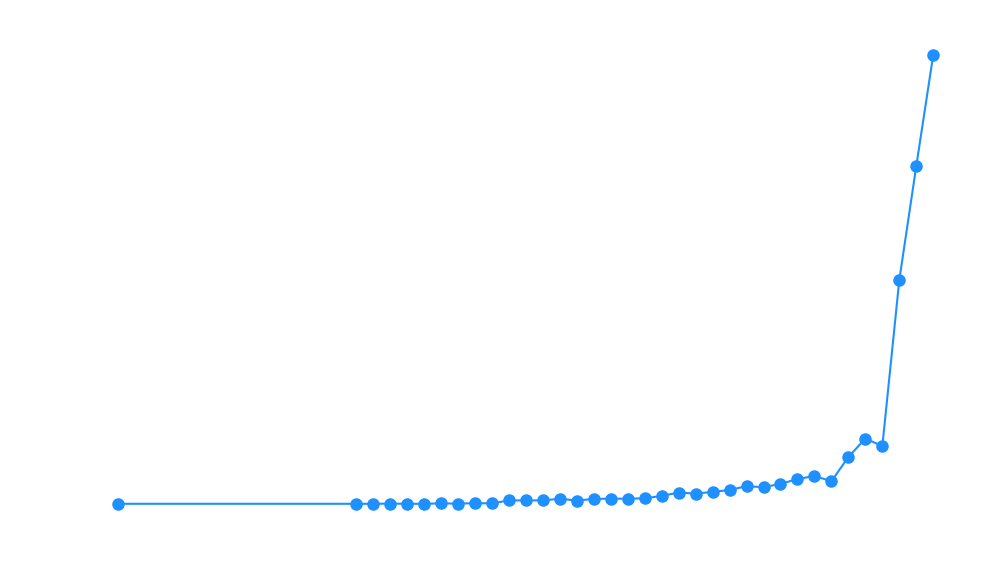

In [129]:
# Extraer el año de 'Date of Launch'
df_ucs['Launch Year'] = df_ucs['Date of Launch'].dt.year

# Filtrar los datos para excluir 2023
df_filtered = df_ucs[df_ucs['Launch Year'] != 2023]

# Contar lanzamientos por año (sin considerar 2023)
launches_per_year = df_filtered.groupby('Launch Year').size()

# Crear el gráfico de línea con marcadores
plt.figure(figsize=(10, 6), facecolor='none')
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', color='dodgerblue', markersize=8)

# Añadir título y etiquetas
plt.title('Annual Evolution of Satellite Launches', fontsize=14, color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Launches', color='white')

# Estética: fondo transparente y ticks en blanco
plt.gca().set_facecolor('none')
plt.gca().tick_params(axis='x', colors='white')  # Ticks del eje X
plt.gca().tick_params(axis='y', colors='white')  # Ticks del eje Y

# Eliminar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


2. TOP 12 Operators/Owners

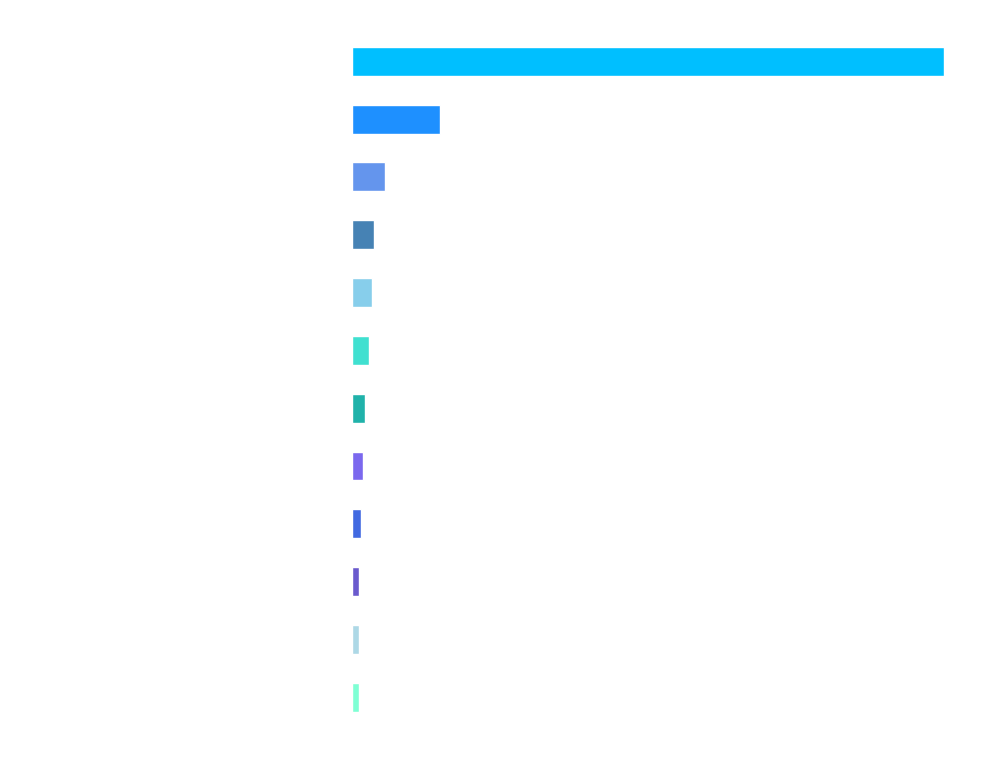

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Tomar top 12
top_12_operators = df_ucs['Operator/Owner'].value_counts().head(12)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 8), facecolor='none')
fig.patch.set_alpha(0)  # Fondo transparente

# Colores con azul vibrante y contraste
colors = ['deepskyblue', 'dodgerblue', 'cornflowerblue', 'steelblue',
          'skyblue', 'turquoise', 'lightseagreen', 'mediumslateblue',
          'royalblue', 'slateblue', 'lightblue', 'aquamarine']

# Graficar
top_12_operators.plot(kind='barh', color=colors, ax=ax)

# Estética
ax.set_title('Top 12 Satellite Operators/Owners', color='white', fontsize=14)
ax.set_xlabel('Number of Satellites', color='white')
ax.set_ylabel('Operator/Owner', color='white')
ax.invert_yaxis()  # Más frecuente arriba
ax.set_facecolor('none')  # Fondo de los ejes transparente
ax.tick_params(colors='white')  # Ticks blancos

plt.tight_layout()
plt.show()


3. TOP 10 Launch Vehicle

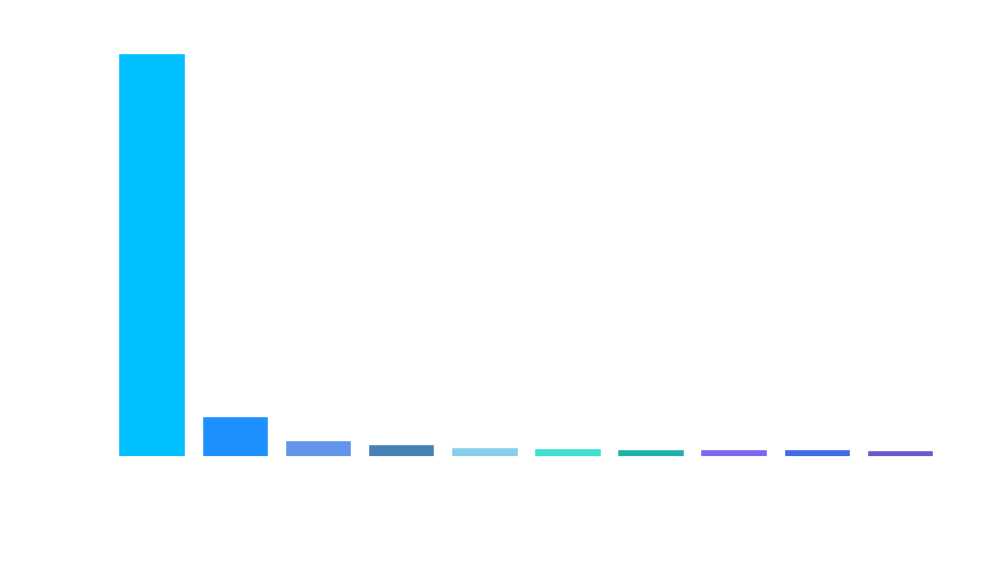

In [131]:
# Top 10 launch vehicles
top_10_launch_vehicles = launch_vehicle_counts.head(10)

# Colores reutilizados del gráfico anterior (ajustados a 10)
colors = ['deepskyblue', 'dodgerblue', 'cornflowerblue', 'steelblue',
          'skyblue', 'turquoise', 'lightseagreen', 'mediumslateblue',
          'royalblue', 'slateblue']

# Crear figura con fondo transparente
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
fig.patch.set_alpha(0)

# Graficar
ax.bar(top_10_launch_vehicles.index, top_10_launch_vehicles.values, color=colors)

# Estética
ax.set_title('Top 10 Launch Vehicles by Frequency', color='white', fontsize=14)
ax.set_xlabel('Launch Vehicle', color='white')
ax.set_ylabel('Frequency', color='white')
ax.tick_params(colors='white')
ax.set_facecolor('none')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


4. TOP 8 Countries by Number of Satellite

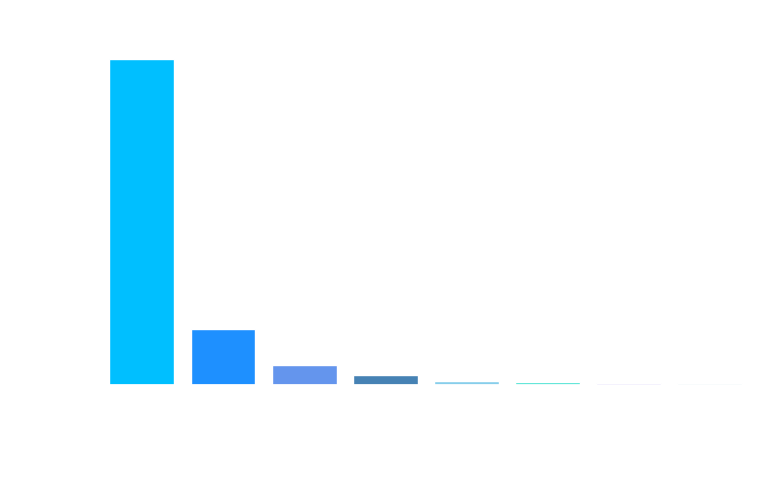

In [132]:
# Filtrar 'Unknown' y tomar top 8
top_countries = df_ucs['Country/Org of UN Registry'].value_counts().loc[lambda x: x.index != 'Unknown'].head(8)

# Colores estilo azules
colors = ['deepskyblue', 'dodgerblue', 'cornflowerblue', 'steelblue',
          'skyblue', 'turquoise', 'mediumslateblue', 'lightblue']

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 5), dpi=100, facecolor='none')
fig.patch.set_alpha(0)
bars = ax.bar(top_countries.index, top_countries.values, color=colors)

# Estética blanca y fondo transparente
ax.set_facecolor('none')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

# Títulos
ax.set_title('Top 8 Countries by Number of Satellites', pad=15)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Satellites')
plt.xticks(rotation=30, ha='right')

# Anotar valores encima
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 50, f'{int(h)}',
            ha='center', va='bottom', color='white', fontsize=9)

plt.tight_layout()

5. Satellite Mass vs Average Launch Temperature

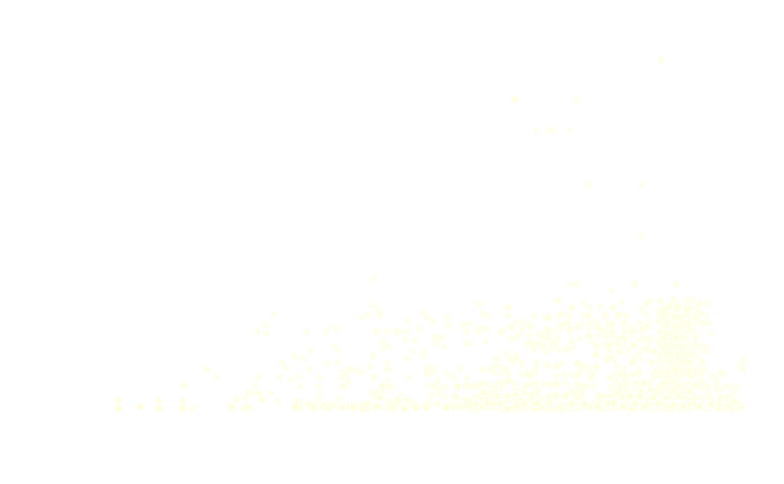

In [133]:
# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')
ax.scatter(df_ucs['temperature_2m_mean'], df_ucs['Launch Mass (kg.)'], 
           alpha=0.5, s=30, c='lightyellow', edgecolors='white')

# El estilo que queremos
ax.set_facecolor('none')
fig.patch.set_alpha(0)
for spine in ax.spines.values():
    spine.set_color('white')
ax.tick_params(colors='white')
ax.set_title('Satellite Mass vs. Average Launch Temperature', color='white', pad=15)
ax.set_xlabel('Average Temperature (°C)', color='white')
ax.set_ylabel('Launch Mass (kg)', color='white')

plt.tight_layout()
plt.show()

6. Average, top5 users, puropse y class of orbit

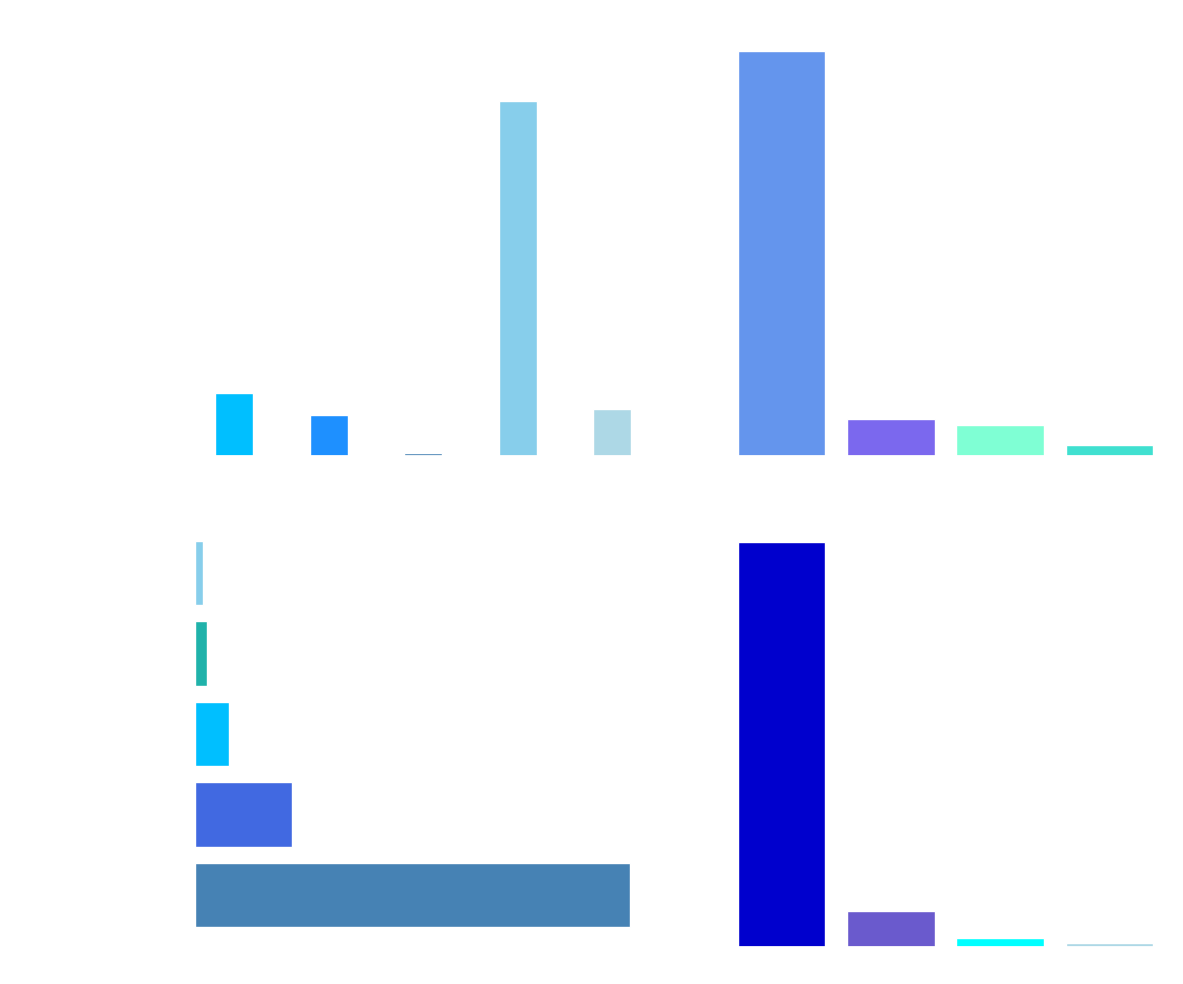

In [134]:
# Estilo general
sns.set(style="dark", palette="muted")

fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='none')
fig.patch.set_alpha(0)

# A: Average Lifetime
lifetime_data = df_ucs['Expected Lifetime (yrs.)'].dropna()
mean_life = lifetime_data.mean()
std_life = lifetime_data.std()
min_life = lifetime_data.min()
max_life = lifetime_data.max()
median_life = lifetime_data.median()

statistics = ['Mean', 'STD', 'Min', 'Max', 'Median']
values = [mean_life, std_life, min_life, max_life, median_life]

colors_a = ['deepskyblue', 'dodgerblue', 'steelblue', 'skyblue', 'lightblue']
axes[0, 0].bar(statistics, values, color=colors_a, width=0.4)
axes[0, 0].set_title('Average Lifetime (yrs.)', color='white')
for i, value in enumerate(values):
    axes[0, 0].text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='white', fontsize=12)
axes[0, 0].set_ylim(0, max(values) * 1.2)
axes[0, 0].set_facecolor('none')
axes[0, 0].tick_params(colors='white')

# B: Users top 4
users = df_ucs['Users'].value_counts().head(4)
colors_b = ['cornflowerblue', 'mediumslateblue', 'aquamarine', 'turquoise']
axes[0, 1].bar(users.index, users.values, color=colors_b)
axes[0, 1].set_title('Top 4 Users', color='white')
axes[0, 1].tick_params(colors='white')
axes[0, 1].set_facecolor('none')

# C: Purpose distribution
purp = df_ucs['Purpose'].value_counts().head(5)
colors_c = ['steelblue', 'royalblue', 'deepskyblue', 'lightseagreen', 'skyblue']
axes[1, 0].barh(purp.index, purp.values, color=colors_c)
axes[1, 0].set_title('Purpose Distribution', color='white')
axes[1, 0].set_facecolor('none')
axes[1, 0].tick_params(colors='white')

# D: Class of Orbit
coo = df_ucs['Class of Orbit'].value_counts()
colors_d = ['mediumblue', 'slateblue', 'aqua', 'lightblue']
axes[1, 1].bar(coo.index, coo.values, color=colors_d)
axes[1, 1].set_title('Class of Orbit', color='white')
axes[1, 1].tick_params(colors='white')
axes[1, 1].set_facecolor('none')

plt.tight_layout()
plt.show()

7. Clima

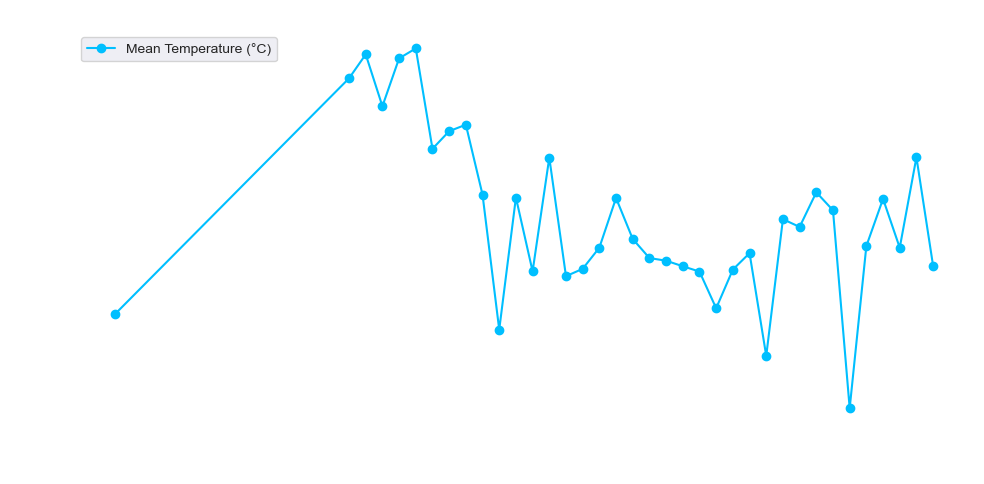

In [135]:
# Calcular la temperatura media por año
df_ucs['year'] = df_ucs['Date of Launch'].dt.year
temperature_per_year = df_ucs.groupby('year')['temperature_2m_mean'].mean()

# Crear la figura para la temperatura
plt.figure(figsize=(10, 5), facecolor='none')

# Trazar la línea para la temperatura
plt.plot(temperature_per_year.index, temperature_per_year.values, label='Mean Temperature (°C)', color='deepskyblue', marker='o')

# Estética
plt.title('Yearly Evolution of Mean Temperature', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Mean Temperature (°C)', color='white')
plt.legend(loc='upper left', fontsize=10)
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.gca().set_facecolor('none')
plt.tight_layout()
plt.show()

8. Otros

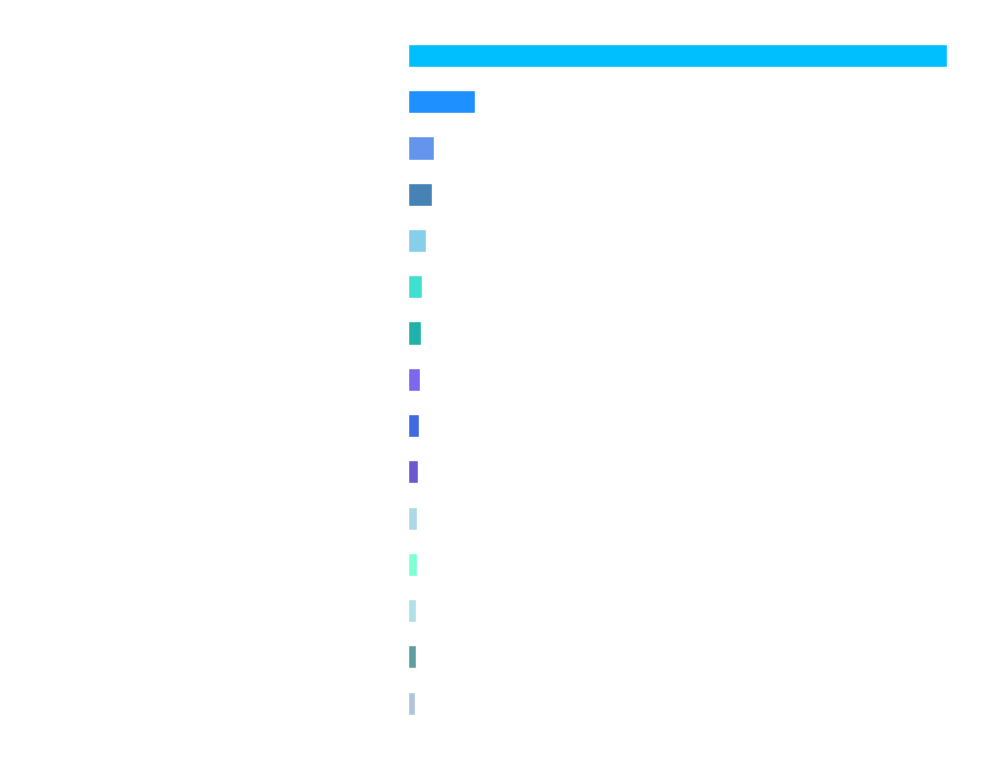

In [136]:
# Top 15 contractors
top_15_contractors = df_ucs['Contractor'].value_counts().head(15)

# Colores (ajustados a 15 con repetición suave si hay menos en la paleta)
colors = ['deepskyblue', 'dodgerblue', 'cornflowerblue', 'steelblue',
          'skyblue', 'turquoise', 'lightseagreen', 'mediumslateblue',
          'royalblue', 'slateblue', 'lightblue', 'aquamarine',
          'powderblue', 'cadetblue', 'lightsteelblue']

# Crear figura con fondo transparente
fig, ax = plt.subplots(figsize=(10, 8), facecolor='none')
fig.patch.set_alpha(0)

# Graficar
top_15_contractors.plot(kind='barh', color=colors, ax=ax)

# Estética
ax.set_title('Top 15 Satellite Contractors', color='white', fontsize=14)
ax.set_xlabel('Number of Satellites', color='white')
ax.set_ylabel('Contractor', color='white')
ax.tick_params(colors='white')
ax.set_facecolor('none')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

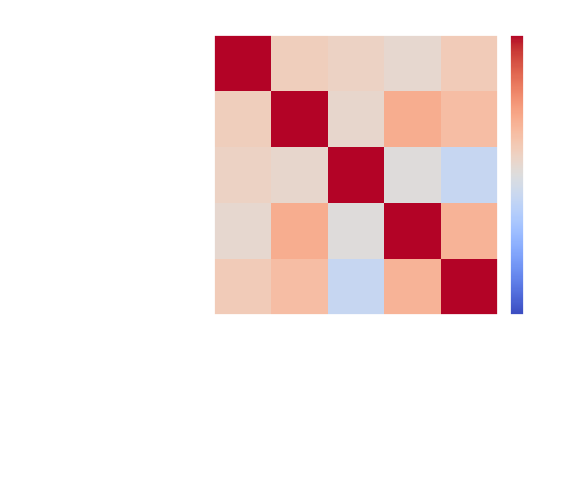

In [138]:
meteo_cols = [
    'temperature_2m_mean',
    'precipitation_sum',
    'windspeed_10m_max',
    'cloudcover_mean',
    'relative_humidity_2m_mean'
]
corr = df_ucs[meteo_cols].corr()

fig, ax = plt.subplots(figsize=(6, 5), facecolor='none')
im = ax.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm', aspect='auto')

# Ejes y etiquetas
ax.set_xticks(range(len(meteo_cols)))
ax.set_xticklabels(meteo_cols, rotation=45, ha='right', color='white')
ax.set_yticks(range(len(meteo_cols)))
ax.set_yticklabels(meteo_cols, color='white')

for spine in ax.spines.values():
    spine.set_color('white')
ax.tick_params(colors='white')
ax.set_title('Correlación de Variables Meteorológicas', color='white', pad=10)

# Colorbar con texto blanco
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')
plt.setp(plt.getp(cbar.ax, 'yticklabels'), color='white')

plt.tight_layout()
plt.show()


# Descargamos el Dataset final

In [ ]:
df_ucs.to_csv("final_dataset.csv", index=False)

In [ ]:
'''
Para volver a cargarlo si está en el mismo directorio
import pandas as pd
df = pd.read_csv("final_dataset.csv")

Si no está en el mismo directorio:
df = pd.read_excel(r'C:\Users\Usuario\Desktop\Ironhack\Bootcamp\03_Week3\satellite_data_analysis\Datasets\final_dataset.xlsx')
'''

'\nPara volver a cargarlo\nimport pandas as pd\ndf = pd.read_csv("final_dataset.csv")\n\nSi no está en el mismo directorio:\n'